In [2]:
set.seed(123)
tupakka = read.table("tupakka.txt", header=T, sep="\t")
hald = read.table("hald.txt", header=T, sep="\t")
vehna = read.table("VehnanSato.txt", header=T, sep="\t")

In [3]:
tupakka

,CONFINTL,CONFINTU,DIST,FIT,KULUTUS,LEV,MAA,OUT,PDIST,POUT,PREDINTL,PREDINTU,RES,SAIRAST,STDRES
1,32.9283930,199.3800600,0.0698498,116.1542300,220.0000000,0.1912374,1.0000000,-0.7497030,0.9330344,0.4749001,-91.5622400,323.8707000,-58.1542300,58.0000000,-0.7686370
2,43.1384550,202.9169200,0.0200092,123.0276900,250.0000000,0.1762110,2.0000000,-0.4121030,0.9802331,0.6910847,-83.3745400,329.4299300,-33.0276900,90.0000000,-0.4325350
3,63.1120350,210.4371800,0.0069422,136.7746100,310.0000000,0.1498132,3.0000000,-0.2658130,0.9930872,0.7971046,-67.2983400,340.8475600,-21.7746100,115.0000000,-0.2807010
4,123.3191300,241.8762100,0.0089318,182.5976700,510.0000000,0.0970178,4.0000000,-0.3880350,0.9911168,0.7081114,-16.7350500,381.9304100,-32.5976700,150.0000000,-0.4077530
5,85.4791780,220.1461900,0.0017162,152.8126800,380.0000000,0.1251754,5.0000000,0.1462183,0.9982856,0.8873664,-49.0620100,354.6873800,12.1873140,165.0000000,0.1548811
6,107.9939500,231.9987100,0.0000000,169.9963300,455.0000000,0.1061385,6.0000000,0.0000434,1.0000000,0.9999664,-30.1633200,370.1559900,0.0036643,170.0000000,0.0000461
7,238.7555700,479.2774000,2.2332043,359.0164800,1280.0000000,0.3993056,7.0000000,-4.8544330,0.1631016,0.0012647,133.8892300,584.1437400,-169.0164000,190.0000000,-2.5921090
8,109.4318200,232.8519900,0.0505972,171.1419100,460.0000000,0.1051402,8.0000000,0.9201073,0.9509299,0.3844218,-28.9273900,371.2112200,73.8580870,245.0000000,0.9280504
9,128.6087300,245.7512300,0.0322199,187.1799800,530.0000000,0.0947165,9.0000000,0.7666085,0.9684048,0.4653323,-11.9435500,386.3035300,62.8200140,250.0000000,0.7847959
10,222.8801500,419.5447600,0.0290855,321.2124500,1115.0000000,0.2669616,10.0000000,0.3801933,0.9714243,0.7136974,106.9956600,535.4292500,28.7875410,350.0000000,0.3996614


In [4]:
malli <- lm(SAIRAST~KULUTUS, data=tupakka)

In [5]:
malli


Call:
lm(formula = SAIRAST ~ KULUTUS, data = tupakka)

Coefficients:
(Intercept)      KULUTUS  
    65.7489       0.2291  


In [6]:
maat <- c("Islanti", "Norja", "Ruotsi", "Kanada", "Tanska", "Itävalta", "USA", "Hollanti", "Sveitsi", "Suomi", "Englanti")

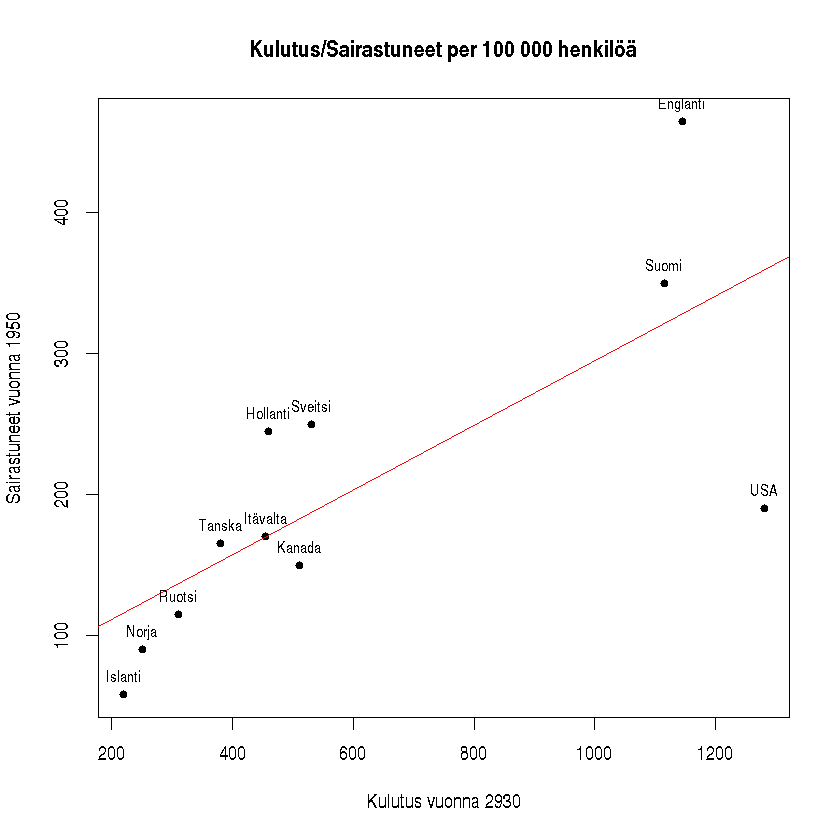

In [7]:
plot(tupakka$KULUTUS, tupakka$SAIRAST, ylab="Sairastuneet vuonna 1950", xlab="Kulutus vuonna 2930", pch=16,
    main="Kulutus/Sairastuneet per 100 000 henkilöä")
abline(malli, col="red")
text(tupakka$KULUTUS, tupakka$SAIRAST, labels=maat, cex=0.8, pos=3)

In [8]:
FIT <- malli$fit
RES <- malli$res

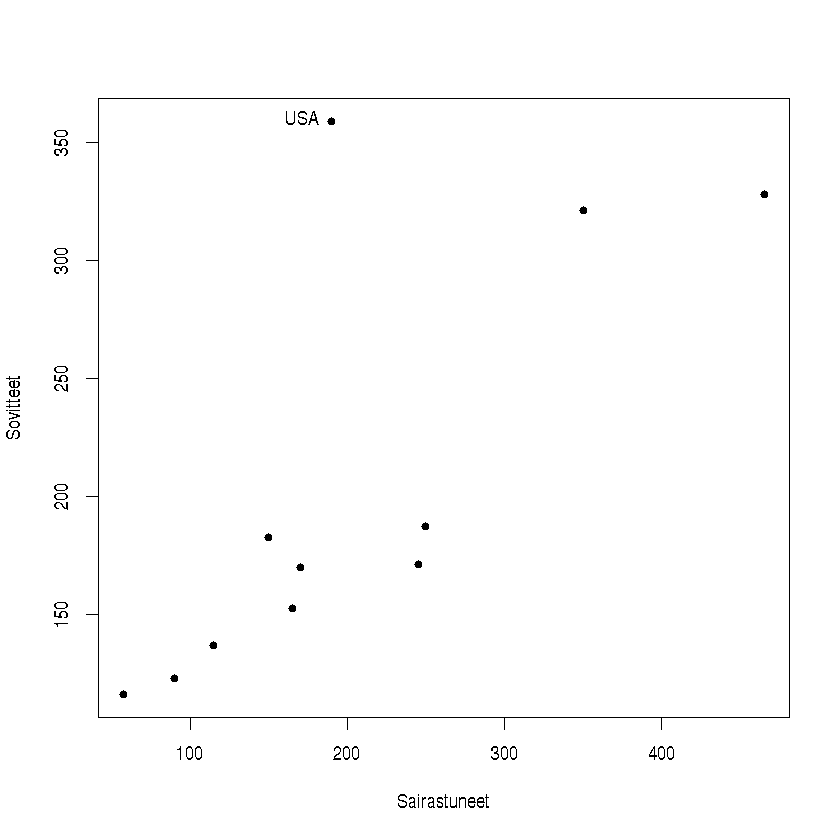

In [9]:
plot(tupakka$SAIRAST, FIT, ylab="Sovitteet", xlab="Sairastuneet", pch=16)
text(tupakka$SAIRAST, FIT, labels = ifelse(rownames(tupakka)=="7", maat, NA), pos=2)

In [10]:
summary(malli)


Call:
lm(formula = SAIRAST ~ KULUTUS, data = tupakka)

Residuals:
     Min       1Q   Median       3Q      Max 
-169.016  -32.813    0.004   45.804  136.914 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 65.74886   48.95871   1.343  0.21217   
KULUTUS      0.22912    0.06921   3.310  0.00908 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 84.13 on 9 degrees of freedom
Multiple R-squared:  0.549,	Adjusted R-squared:  0.4989 
F-statistic: 10.96 on 1 and 9 DF,  p-value: 0.009081


function (side, at = NULL, labels = TRUE, tick = TRUE, line = NA, 
    pos = NA, outer = FALSE, font = NA, lty = "solid", lwd = 1, 
    lwd.ticks = lwd, col = NULL, col.ticks = NULL, hadj = NA, 
    padj = NA, ...) 
{
    if (is.null(col) && !missing(...) && !is.null(fg <- list(...)$fg)) 
        col <- fg
    invisible(.External.graphics(C_axis, side, at, as.graphicsAnnot(labels), 
        tick, line, pos, outer, font, lty, lwd, lwd.ticks, col, 
        col.ticks, hadj, padj, ...))
}
<bytecode: 0x31a0e38>
<environment: namespace:graphics>

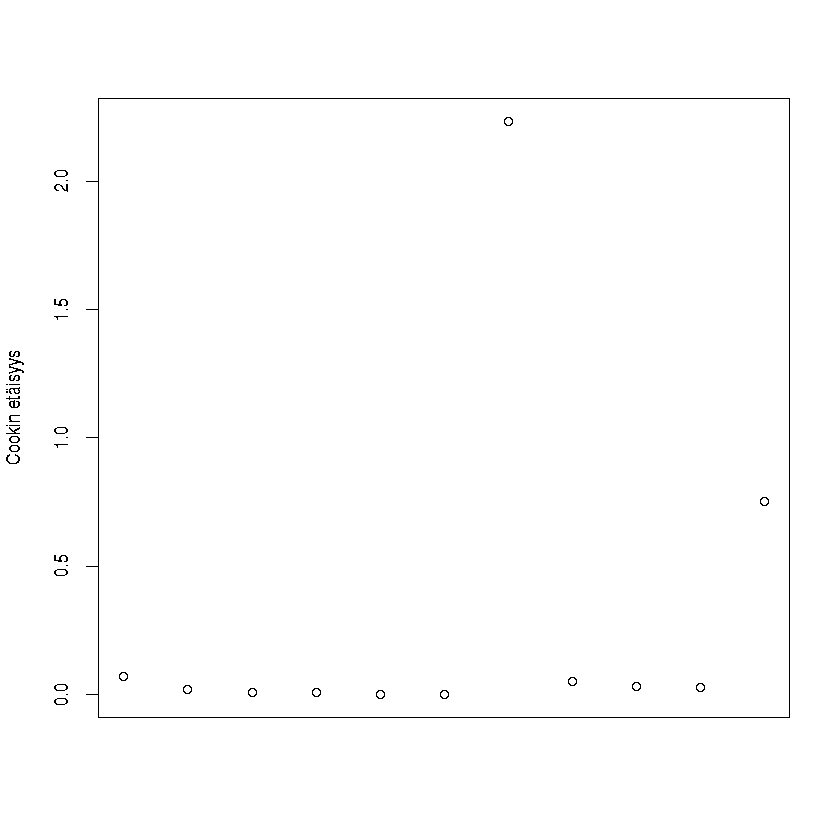

In [11]:
cooksd <- cooks.distance(malli)
x <- plot(cooksd, xaxt="n", xlab=" ", ylab="Cookin etäisyys")
axis

In [12]:
tupakka2 <- tupakka[-7,]
malli2 <- lm(SAIRAST~KULUTUS, data=tupakka2)
summary(malli2)


Call:
lm(formula = SAIRAST ~ KULUTUS, data = tupakka2)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.353 -28.923  -7.861  35.321  66.919 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.55343   28.26713   0.479    0.644    
KULUTUS      0.35767    0.04547   7.867 4.93e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.92 on 8 degrees of freedom
Multiple R-squared:  0.8855,	Adjusted R-squared:  0.8712 
F-statistic: 61.88 on 1 and 8 DF,  p-value: 4.928e-05


In [13]:
taysimalli <- lm(HEAT~CHEM1+CHEM2+CHEM3+CHEM4, data=hald)
summary(taysimalli)


Call:
lm(formula = HEAT ~ CHEM1 + CHEM2 + CHEM3 + CHEM4, data = hald)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
CHEM1         1.5511     0.7448   2.083   0.0708 .
CHEM2         0.5102     0.7238   0.705   0.5009  
CHEM3         0.1019     0.7547   0.135   0.8959  
CHEM4        -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


In [14]:
vif(taysimalli)

ERROR: Error in eval(expr, envir, enclos): could not find function "vif"


In [15]:
install.packages("car")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
library(car)

In [17]:
vif(taysimalli)

CHEM1     CHEM2     CHEM3     CHEM4 
 38.49621 254.42317  46.86839 282.51286

In [18]:
cor(hald)

,CHEM1,CHEM2,CHEM3,CHEM4,HEAT,SUM
CHEM1,1.00000000,0.22857947,-0.82413376,-0.24544511,0.73071747,0.05010722
CHEM2,0.2285795,1.0000000,-0.1392424,-0.9729550,0.8162526,-0.2604492
CHEM3,-0.8241338,-0.1392424,1.0000000,0.0295370,-0.5346707,-0.1102512
CHEM4,-0.2454451,-0.9729550,0.0295370,1.0000000,-0.8213050,0.3290769
HEAT,0.7307175,0.8162526,-0.5346707,-0.8213050,1.0000000,-0.1645805
SUM,0.05010722,-0.26044918,-0.11025122,0.32907694,-0.16458053,1.00000000


In [27]:
malli2 <- lm(CHEM3~CHEM1+CHEM2+CHEM4,data=hald)

In [28]:
summary(malli2)


Call:
lm(formula = CHEM3 ~ CHEM1 + CHEM2 + CHEM4, data = hald)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1591 -0.7314  0.1962  0.7098  1.0475 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 90.69759    6.61765   13.71 2.46e-07 ***
CHEM1       -0.97307    0.05475  -17.77 2.56e-08 ***
CHEM2       -0.92296    0.08685  -10.63 2.15e-06 ***
CHEM4       -0.90746    0.08109  -11.19 1.39e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.08 on 9 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9716 
F-statistic: 137.6 on 3 and 9 DF,  p-value: 7.762e-08


In [29]:
step(taysimalli)

Start:  AIC=26.94
HEAT ~ CHEM1 + CHEM2 + CHEM3 + CHEM4

        Df Sum of Sq    RSS    AIC
- CHEM3  1    0.1091 47.973 24.974
- CHEM4  1    0.2470 48.111 25.011
- CHEM2  1    2.9725 50.836 25.728
<none>               47.864 26.944
- CHEM1  1   25.9509 73.815 30.576

Step:  AIC=24.97
HEAT ~ CHEM1 + CHEM2 + CHEM4

        Df Sum of Sq    RSS    AIC
<none>                47.97 24.974
- CHEM4  1      9.93  57.90 25.420
- CHEM2  1     26.79  74.76 28.742
- CHEM1  1    820.91 868.88 60.629



Call:
lm(formula = HEAT ~ CHEM1 + CHEM2 + CHEM4, data = hald)

Coefficients:
(Intercept)        CHEM1        CHEM2        CHEM4  
    71.6483       1.4519       0.4161      -0.2365  


In [30]:
parasmalli <- lm(HEAT~CHEM1+CHEM2+CHEM4, data=hald)

In [31]:
summary(parasmalli)


Call:
lm(formula = HEAT ~ CHEM1 + CHEM2 + CHEM4, data = hald)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
CHEM1         1.4519     0.1170  12.410 5.78e-07 ***
CHEM2         0.4161     0.1856   2.242 0.051687 .  
CHEM4        -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


In [32]:
hist(parasmalli)

ERROR: Error in hist.default(parasmalli): 'x' must be numeric


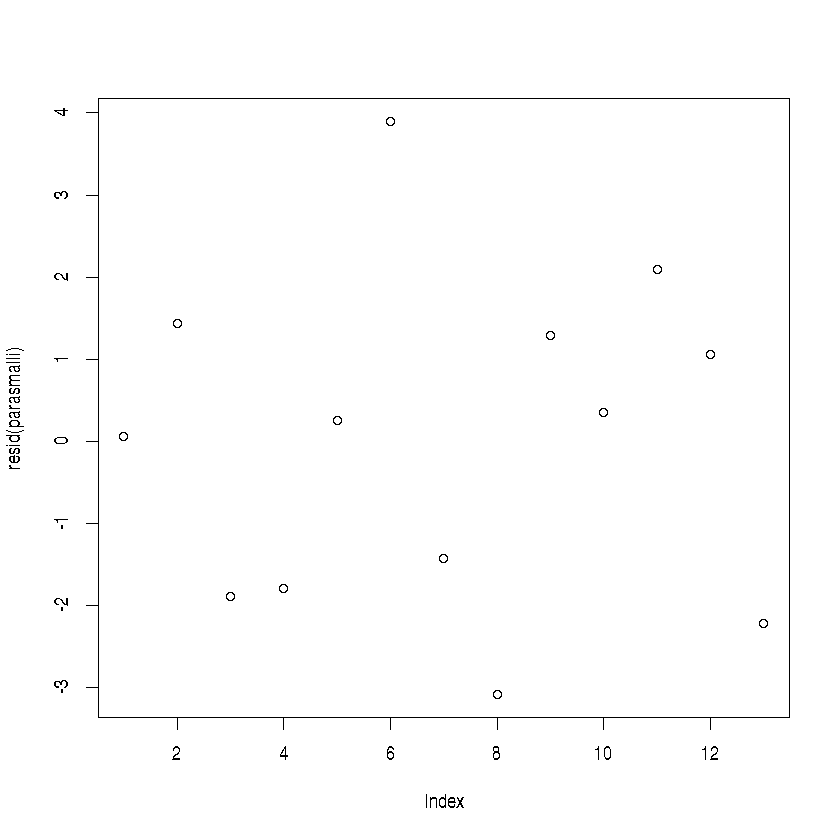

In [33]:
plot(resid(parasmalli))

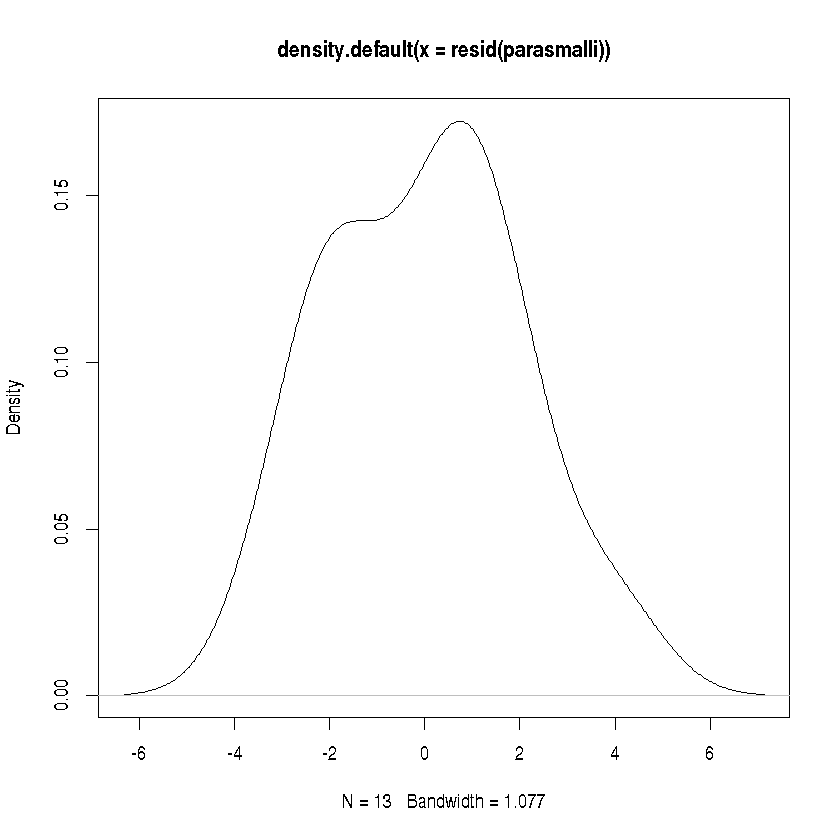

In [34]:
plot(density(resid(parasmalli)))

In [44]:
summary(parasmalli <- lm(HEAT~CHEM2+CHEM3+CHEM4, data=hald))


Call:
lm(formula = HEAT ~ CHEM2 + CHEM3 + CHEM4, data = hald)

Residuals:
   Min     1Q Median     3Q    Max 
-4.906 -1.422  0.123  1.934  3.633 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 203.6420    20.6478   9.863 4.01e-06 ***
CHEM2        -0.9234     0.2619  -3.525 0.006462 ** 
CHEM3        -1.4480     0.1471  -9.846 4.07e-06 ***
CHEM4        -1.5570     0.2413  -6.454 0.000118 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.864 on 9 degrees of freedom
Multiple R-squared:  0.9728,	Adjusted R-squared:  0.9638 
F-statistic: 107.4 on 3 and 9 DF,  p-value: 2.302e-07


In [45]:
vif(parasmalli)

CHEM2     CHEM3     CHEM4 
24.309176  1.298236 23.858675

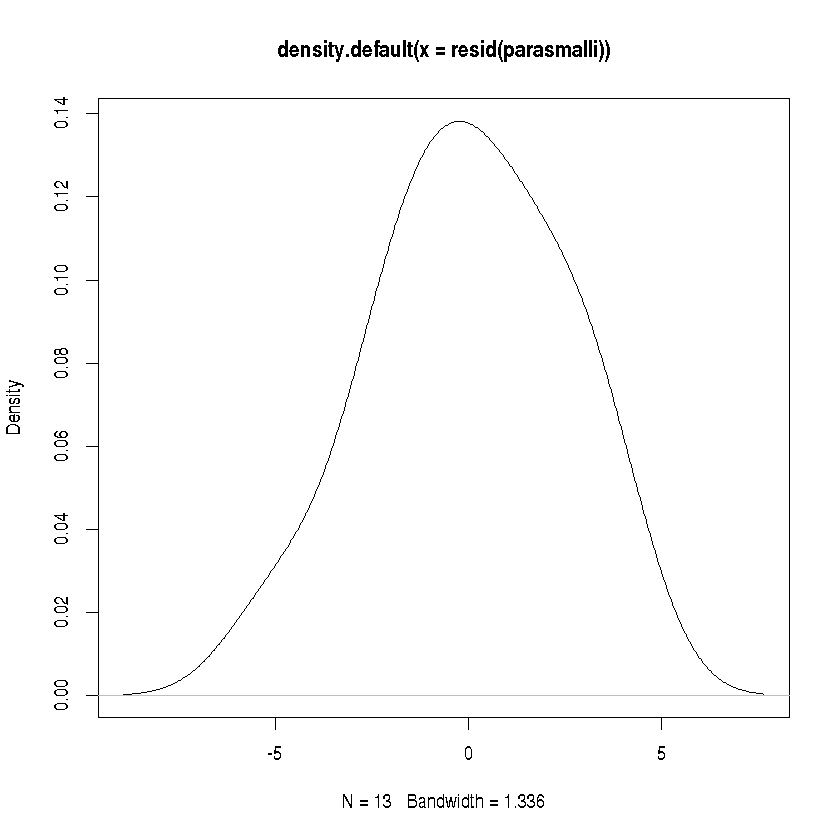

In [46]:
plot(density(resid(parasmalli)))

In [48]:
vehna

,LSqrd,Lannoite,Sato
1,0,0,190
2,0,0,190
3,0,0,200
4,1,1,215
5,1,1,220
6,1,1,230
7,4,2,240
8,4,2,250
9,4,2,255
10,9,3,255


In [54]:
summary(sqrdmalli_vehna <- lm(Sato~LSqrd, data=vehna))


Call:
lm(formula = Sato ~ LSqrd, data = vehna)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.803 -18.225   5.184  20.444  46.645 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 247.8030     7.6493  32.395   <2e-16 ***
LSqrd         0.4221     0.1594   2.648   0.0126 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.06 on 31 degrees of freedom
Multiple R-squared:  0.1845,	Adjusted R-squared:  0.1582 
F-statistic: 7.012 on 1 and 31 DF,  p-value: 0.01262


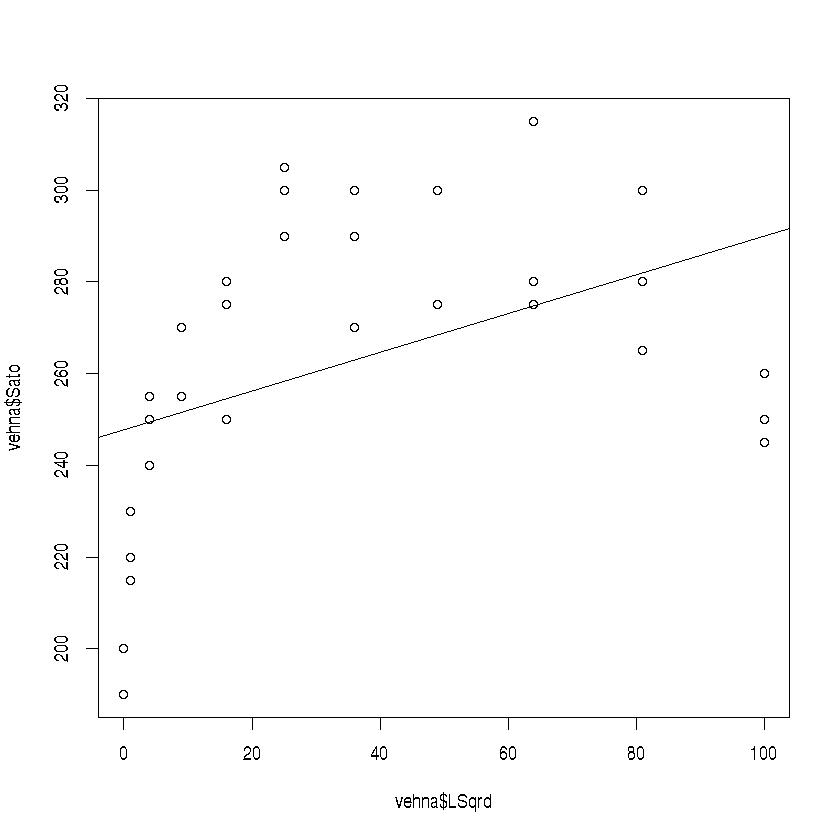

In [76]:
plot(vehna$LSqrd, vehna$Sato)
abline(sqrdmalli_vehna)

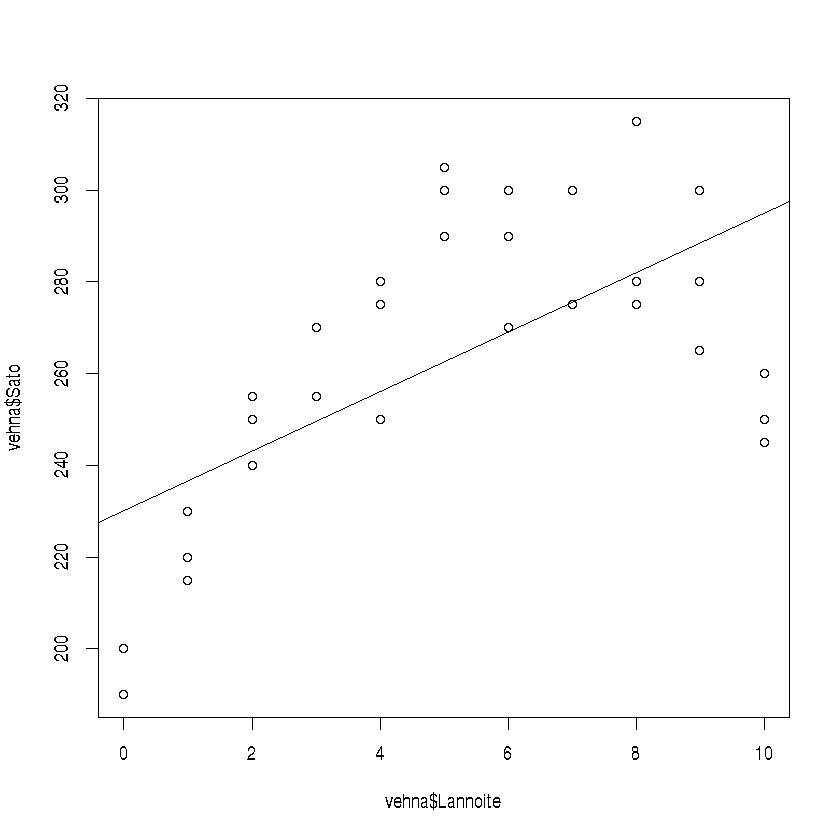

In [77]:
plot(vehna$Lannoite, vehna$Sato)
abline(lannoitemalli_vehna)

In [78]:
summary(taysimalli_vehna)


Call:
lm(formula = Sato ~ LSqrd + Lannoite, data = vehna)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.256  -8.007  -1.196   6.690  30.554 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 193.3100     5.6511  34.207  < 2e-16 ***
LSqrd        -2.4611     0.2532  -9.719 8.85e-11 ***
Lannoite     31.0812     2.6292  11.821 8.11e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.85 on 30 degrees of freedom
Multiple R-squared:  0.8559,	Adjusted R-squared:  0.8463 
F-statistic: 89.07 on 2 and 30 DF,  p-value: 2.407e-13


In [79]:
summary(lannoitemalli_vehna)


Call:
lm(formula = Sato ~ Lannoite, data = vehna)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.924 -16.697  -0.515  20.364  42.424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  230.227      8.384  27.462  < 2e-16 ***
Lannoite       6.470      1.417   4.565 7.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.74 on 31 degrees of freedom
Multiple R-squared:  0.402,	Adjusted R-squared:  0.3828 
F-statistic: 20.84 on 1 and 31 DF,  p-value: 7.432e-05


In [81]:
vif(taysimalli_vehna)

LSqrd Lannoite 
13.82051 13.82051

In [83]:
summary(sqrdmalli_vehna)


Call:
lm(formula = Sato ~ LSqrd, data = vehna)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.803 -18.225   5.184  20.444  46.645 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 247.8030     7.6493  32.395   <2e-16 ***
LSqrd         0.4221     0.1594   2.648   0.0126 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.06 on 31 degrees of freedom
Multiple R-squared:  0.1845,	Adjusted R-squared:  0.1582 
F-statistic: 7.012 on 1 and 31 DF,  p-value: 0.01262


In [89]:
summary(lm(Lannoite~LSqrd, data=vehna))


Call:
lm(formula = Lannoite ~ LSqrd, data = vehna)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7532 -0.8460  0.3098  0.7625  0.9276 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.753247   0.223303   7.851 7.33e-09 ***
LSqrd       0.092764   0.004653  19.936  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8776 on 31 degrees of freedom
Multiple R-squared:  0.9276,	Adjusted R-squared:  0.9253 
F-statistic: 397.4 on 1 and 31 DF,  p-value: < 2.2e-16


In [87]:
vif(taysimalli_vehna)

LSqrd Lannoite 
13.82051 13.82051

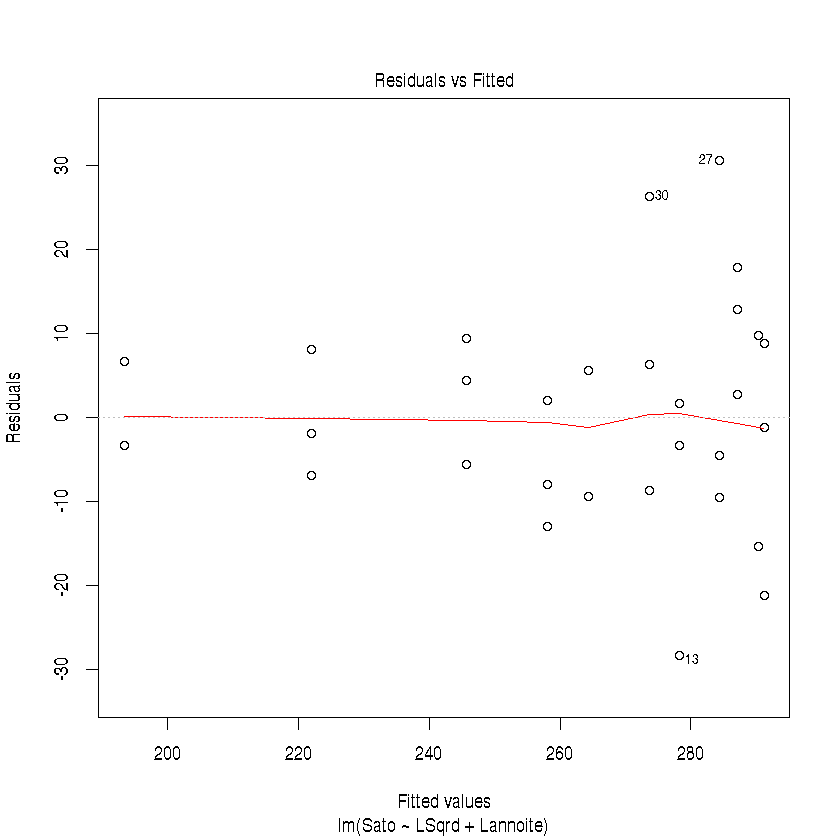

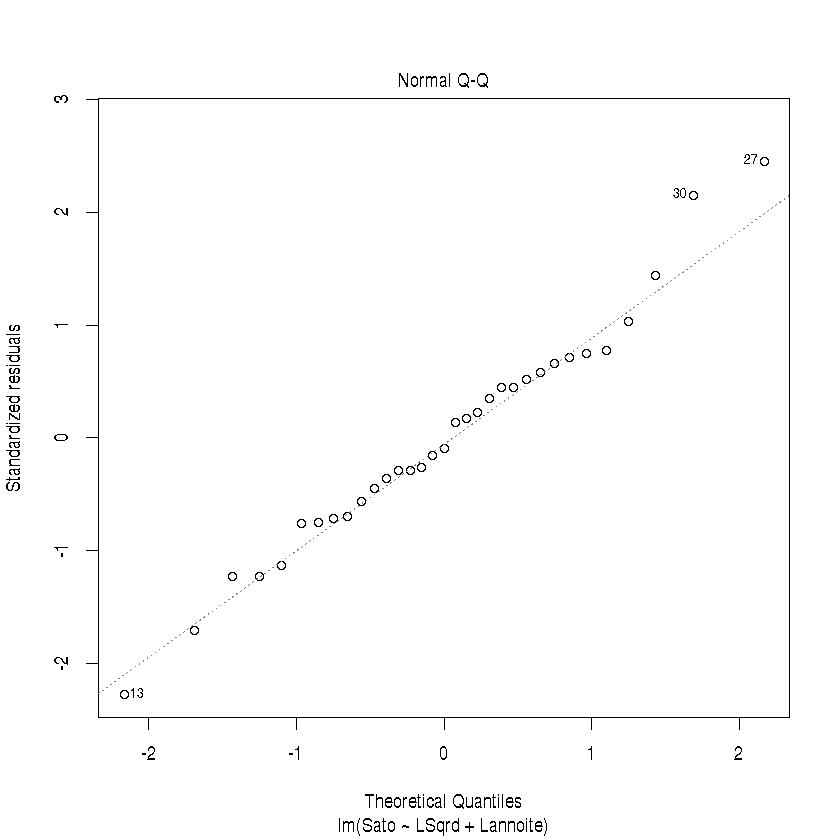

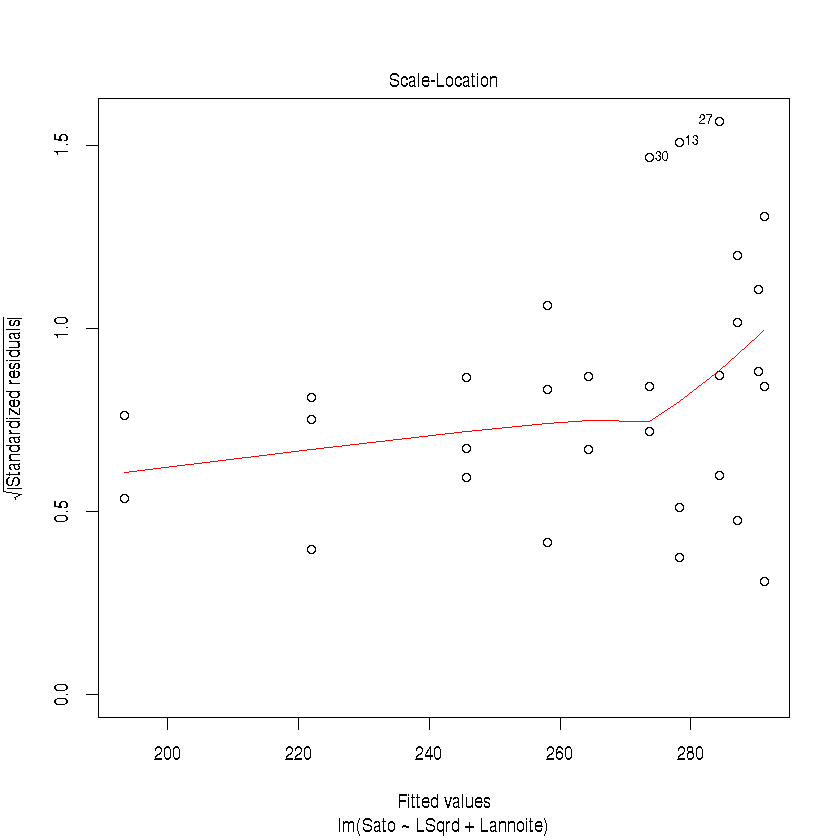

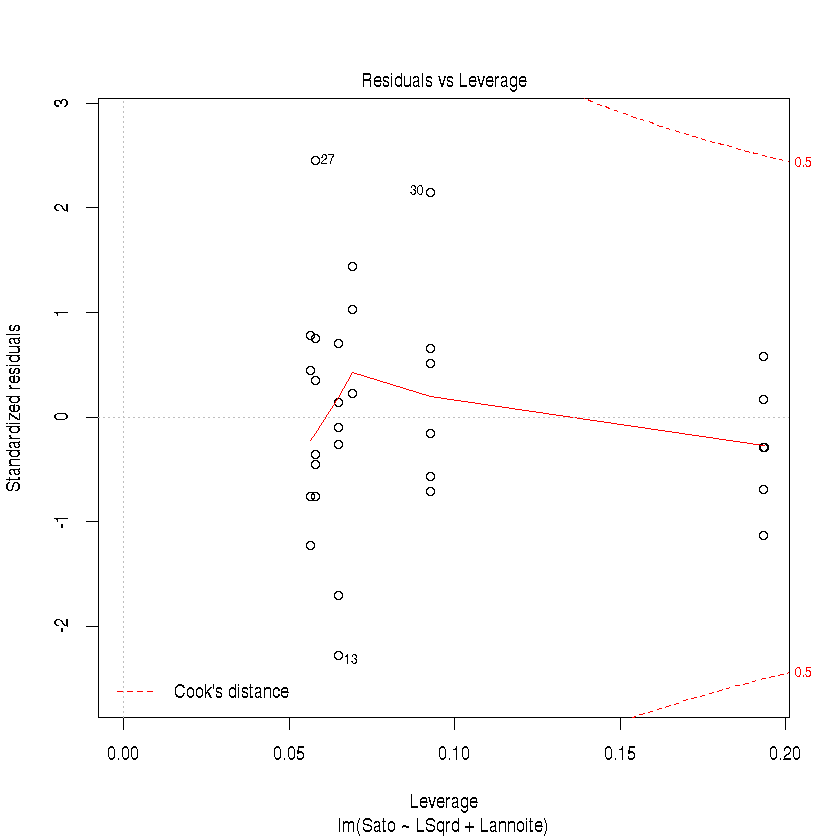

In [90]:
plot(taysimalli_vehna)